In [1]:
%load_ext autoreload 
%autoreload 2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# Data classes

In [ ]:
from cbviz.utils import DataNum

In [ ]:
full = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)
df = full.iloc[:, [0,2]].copy()

dn = DataNum(full)

In [ ]:
expected = np.repeat('floating', 1)
observed = df.apply(infer_dtype).values
type(expected)

In [ ]:
s1 = np.random.permutation(np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30)))
s2 = np.repeat(['Basal-like', "Classical"], (57, 133))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip((2, -2) , (57, 133)) ] for y in x]

df2 = pd.DataFrame({"x" : x, "s1" : s1, "s2" : s2})
df2['s1'] = df2['s1'].astype('category')

In [ ]:
from cbviz.utils import DataMix

In [ ]:
DataMix(df2, ncat=2)

In [ ]:
df = pd.DataFrame({'Age':np.random.randint(low=40, high=90, size=50), 'group':np.repeat(('ctrl', 'polyp'), (25, 25))})

In [ ]:
df = pd.DataFrame({'Age':np.random.randint(low=40, high=90, size=50), 'group':np.repeat((0, 1), (25, 25))})

In [ ]:
df.apply(pd.api.types.infer_dtype)

In [ ]:
list(product(['floating', 'string', 'categorical'], repeat=3))

## DataSurv

In [25]:
X = pd.read_csv("./veteran.csv").iloc[:,[0,1,7]]
X['celltype'] = X['celltype'].map( {1:"squamous", 2:"smallcell", 3:"adeno", 4:"large"})

In [5]:
# Two factor case
X = pd.read_csv("./veteran.csv").iloc[:,[0,1,6,7]]
X['trt'] = X['trt'].map({1:"control", 2:"test_chemo"})
X['celltype'] = X['celltype'].map( {1:"squamous", 2:"smallcell", 3:"adeno", 4:"large"})

In [3]:
from cbviz.utils import DataSurv
from cbviz.survival import KME

In [6]:
from sksurv.util import Surv

In [32]:
X['status'] = X['status'].replace({0:1})

In [33]:
DataSurv(X)

Converting event column to boolean, as all values are 0 or 1.


DataSurv(Obs total: 137, NaN removed: 0,
Time column: time, event column: status,
Annotating feature(s): 1. celltype)

In [34]:
kme = KME(X, s1_order=["squamous", "adeno", "large", "smallcell"])

Converting event column to boolean, as all values are 0 or 1.


In [35]:
kme.calc_pairwise_logranks()

In [36]:
kme.pairwise_logranks

,A,B,chi2,pval,fdr_bh
0,squamous,adeno,10.710505,0.001065,0.001598
1,squamous,large,0.277505,0.598341,0.718010
2,squamous,smallcell,11.302070,0.000774,0.001548
3,adeno,large,18.697495,0.000015,0.000092
4,adeno,smallcell,0.043960,0.833928,0.833928
5,large,smallcell,11.590488,0.000663,0.001548


[0.92692693]


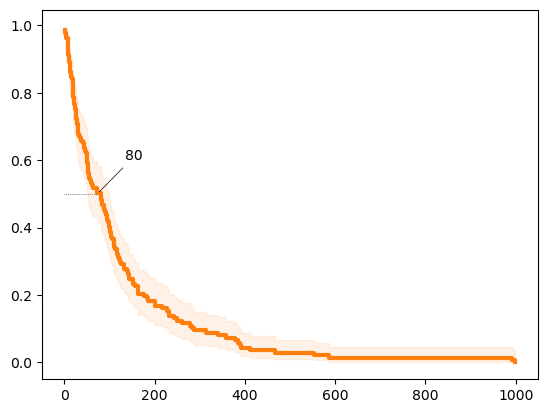

In [38]:
fig, ax = plt.subplots()

kme.kmplot(q=0.5, label_offset=(2, 0.1), ax=ax, lw=3)
# ax.legend(handles=kme.handles, handlelength=1, columnspacing=0.5)

In [153]:
def fwd(vals):
    return np.sqrt(vals)
def rev(vals):
    return np.power(vals, 2)

[0.88988989]
[0.95195195]
[0.85685686]
[0.96896897]


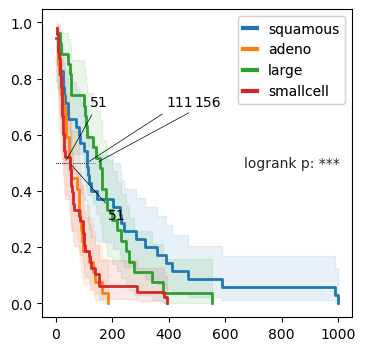

In [39]:
fig, ax = plt.subplots(figsize=(4,4))

kme.kmplot(stratify=True, add_label=True, draw_ci=True, label_offset=(4, 0.2), ax=ax, lw=2)
kme.add_global_p(ax=ax, loc=7, fontsize='medium')
leg1 = ax.legend(handles=kme.handles, handlelength=1, columnspacing=0.5)
ax.add_artist(leg1)
# ax.set_xscale("function", functions=(fwd, rev))

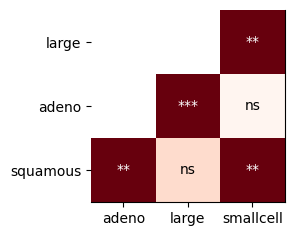

In [40]:
fig, ax = plt.subplots(figsize=(2.5,2.5))

kme.heatmap_pairwise_logranks(ax=ax, fontsize="medium")

# KDE related 

## KDE

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from cbviz.kde import KDE, _get_curve

In [ ]:
data = pd.Series(np.random.normal(size=200), index=['val' + str(i) for i in range(200)])

In [ ]:
KDE(data)

In [ ]:
KDE(data)#, grid_kwargs={'gridsize':500, 'cut':1})

In [ ]:
!which python

In [ ]:
import matplotlib as mpl

In [ ]:
mpl.rcParams['ytick.major.size']

In [ ]:
plt.style.use('cviz')

In [ ]:
plt.fill_between(kde.x, kde.y, edgecolor='k', facecolor='0.5', alpha=0.25)
x, y = kde.find('val1')
plt.plot([x]*2, [0, y], lw=0.5)
plt.savefig('Test.pdf')

## Split violin 

In [ ]:
s1 = np.random.permutation(np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30)))
s2 = np.repeat(['Basal-like', "Classical"], (57, 133))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip((2, -2) , (57, 133)) ] for y in x]

data = pd.DataFrame({"x" : x, "s1" : s1, "s2" : s2})

In [ ]:
from cbviz.cbviz.kdetools import SplitViolin

In [ ]:
sp = SplitViolin(data, s1_order=['WT', 'Balanced', 'Minor', 'Major'], s2_order=['Classical', 'Basal-like'])

In [ ]:
plt.style.use('cviz')
fig, ax = plt.subplots(figsize=(3,2.5))

for kde in sp.get_violins(colors=('cornflowerblue', 'salmon')):

    ax.fill_betweenx(kde.density, kde.grid, facecolor=kde.color, alpha=0.5)
    ax.plot(kde.mode.ycoords, kde.mode.xcoords, lw=0.5, c='k')

ax.set_yticks(*sp.get_s1_ticks())

leg = ax.legend(handles=sp.get_s2_legend(colors=('cornflowerblue', 'salmon')), 
                loc='upper left', handlelength=0.4,
                bbox_to_anchor=(0, 1.0, 0, 0.15), ncol=2, fontsize='x-small')
leg.get_frame().set_linewidth(0.2)

[ax.axhline(i, lw=0.5, ls=":", c='0.5') for i in (sp.get_s1_ticks()[0])]
ax.set_xlabel(sp.ylabel)
# fig.savefig('./test/Test-SplitViolin.pdf')

## Ridge plot

In [ ]:
s1 = np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip(range(4) , (30, 80, 50, 30)) ] for y in x]

data = pd.DataFrame({"x" : x, "s1" : s1})
data

In [ ]:
from cbviz.kde import Ridge

In [ ]:
rp = Ridge(data, s1_order=['WT','Balanced', 'Minor', 'Major'], scale_factor=1.2)

In [ ]:
plt.style.use('cviz')
fig, ax = plt.subplots(figsize=(3,2.5))

for kde in rp.get_kdes():

    ax.fill_betweenx(kde.density, kde.grid, facecolor=kde.color, alpha=0.3)
    ax.plot(kde.mode.ycoords, kde.mode.xcoords, lw=0.1, c='k')

ax.set_yticks(*rp.get_s1_ticks())
ax.set_xlabel(rp.ylabel)
[ax.axhline(i, ls=':', lw=0.25, c='0.15') for i in rp.get_s1_ticks()[0]]

## Bivariate KDEs

In [ ]:
from scipy.stats import gaussian_kde

In [ ]:
m1 = np.random.normal(loc=3, size=100)
m2 = m1 + np.random.normal(loc=0, size=100)

In [ ]:
from cbviz.cbviz.kde import KDE2D

In [ ]:
k2 = KDE2D(m1, m2)

In [ ]:
fig, ax = plt.subplots()

ax.contour(*k2.data, colors='C0', linewidths=0.5, zorder=-1)
ax.scatter(m1, m2, alpha=0.6)

In [ ]:
from cbviz.cbviz.xytools import XYview

In [ ]:
test = pd.DataFrame({'x':m1, 'y':m2})
test = test.take(test.mean(1).argsort())

In [ ]:
s1 = np.repeat((1,2), repeats=50)

In [ ]:
xv = XYview(test)

In [ ]:
fig, ax = plt.subplots()

ax.scatter(xv.x, xv.y, **xv.scatter_kw)
xv.add_2d_densities(s1=s1, grid_kwargs={'cut':1}, linewidths=0.8)

# Scatterplots

## XYview

In [ ]:
metabolites = ['L-Cystine', 'Cysteine', 'NADH']

In [ ]:
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)
df = all.iloc[:, [0,2]].copy()

In [ ]:
from cbviz.cbviz.xytools import XYview
from adjustText import adjust_text

In [ ]:
cond = df.index.isin(metabolites)
s1 = np.where(cond, 40, 10)
xv = XYview(df, s1=cond, s1_colors=['C0', 'C1'], highlight=metabolites, s=np.where(cond, 40, 10), alpha=1)

In [ ]:
plt.style.use('cviz')

fig, ax = plt.subplots(figsize=(3,3))

leg = plt.legend(handles=xv.handles, loc='lower right', markerscale=1.5, fontsize='x-small')
leg.get_frame().set_linewidth(0.25)

ax.scatter(**xv.scatter_call)
xv.add_correlation(fontsize='small')
xv.add_reg_line(color='cornflowerblue', lw=1)
xv.label_dots(adjust=True, fontsize='small')
xv.label_xy()
ax.add_artist(leg)

## XYpairs

In [ ]:
list(None)

In [ ]:
from cbviz.cbviz.xytools import XYpairs

In [ ]:
metabolites = ['L-Cystine', 'Cysteine', 'NADH']

In [ ]:
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)

In [ ]:
np.ptp(all.values.ravel()) * 0.02

In [ ]:
all = all.iloc[:, [1,0,3,2]]

In [ ]:
cond = all.index.isin(metabolites)
xp = XYpairs(all, lower_tri=False)

In [ ]:
plt.style.use('cviz')

fig = plt.figure(figsize=(5, 5))

gs = xp.get_gridspec(hspace=0.3, wspace=0.4)

pairs = xp.get_pairs(highlight=metabolites, s=np.where(cond, 40, 10), c=np.where(cond, 'r', '0.5'), alpha=np.where(cond, 1, 0.5))
for pair in pairs:
    ax = fig.add_subplot(gs[pair.position])
    ax.tick_params(labelsize='xx-small', pad=0)
    xv = pair.XYview
    ax.scatter(xv.x, xv.y, **xv.scatter_kw)
    xv.add_reg_line()
    xv.label_dots(adjust=True, fontsize='x-small')
    if pair.combo == ['FG_effect_sgNT', 'sgARNTL2_effect_FG']:
        xv.add_correlation(loc=1)
    else:
        xv.add_correlation(loc=4)
    xv.label_xy(fontsize='x-small', outer=True)

## XYzoom

In [ ]:
metabolites = ['L-Cystine', 'Cysteine', 'NADH']
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)
df = all.iloc[:, [0,2]].copy()

In [ ]:
from cbviz.cbviz.xytools import XYzoom

In [ ]:
xz = XYzoom(df, ('min', 0), ('min', 0))

In [ ]:
top5 = xz.zoom_data.mean(1).nsmallest(5).index.to_list()
cond = xz.data.df.index.isin(top5)

In [ ]:
top5

In [ ]:
plt.style.use('cviz')

xz = XYzoom(df, ('min', 0), ('min', 0))

top5 = xz.zoom_data.mean(1).nsmallest(5).index.to_list()
cond = xz.data.df.index.isin(top5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2))

ax2.scatter(xz.x, xz.y, **xz.scatter_kw)
xz.add_xy_line(ax2)
xz.add_rect(ax=ax2)
ax1.scatter(xz.x, xz.y, s=np.where(cond, 20, 5), c=np.where(cond, 'r', '.5'), alpha=0.5, linewidths=0)
xz.connect(ax2, ax1, 'left', lw=0.5, ls=':')
xz.label_xy(ax=ax1, outer=False, fontsize='x-small')
xz.label_dots(top5, ax=ax1, adjust=True, adjust_kwargs={'arrowprops':{'arrowstyle':'-', 'lw':0.2}}, fontsize=4)

# Boxplots

## Box plus strip plot

In [ ]:
s1 = np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30))
# s1 = np.repeat(['WT', 'Balanced', 'WT', 'Balanced'], (30, 80, 50, 30))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip(range(4) , (30, 80, 50, 30)) ] for y in x]

data = pd.DataFrame({"x" : x, "s1" : s1})
data

In [ ]:
from cbviz.boxplot import StripBox

In [ ]:
sb = StripBox(data, p_method_global='Anova', s1_order=['WT', 'Balanced', 'Minor', 'Major'])
# sb = StripBox(data, p_method_global='Anova', s1_order=['WT', 'Balanced'])

In [ ]:
plt.style.use('cviz')

fig, ax = plt.subplots(figsize=(2.5,2.5))

sb.boxplt()
sb.add_strips(s=20, alpha=0.50, linewidths=0)
sb.add_global_p(fontsize='xx-small')

In [ ]:
sb.calc_pairwise_p(posthoc_method='tukey')

In [ ]:
plt.style.use('cviz')

fig, ax = plt.subplots(figsize=(3, 2.5))

sb.boxplt()
sb.add_strips(s=20, alpha=0.50, linewidths=0)
sb.add_pair_p(groupA='WT', groupB='Minor', yoffset=0.5, cut_p=True)

In [ ]:
from scipy.stats import f_oneway, ttest_ind

In [ ]:
x, y = [np.random.normal(i, size=100) for i in range(2)]

In [ ]:
data['s1'] = data['s1'].astype('category')

In [ ]:
from pandas.api.types import is_categorical_dtype
def cat_cleaner(series):
    if is_categorical_dtype(series):
        return series.cat.remove_unused_categories()
    else:
        return series

In [ ]:
data[data['s1'].isin(['WT', 'Balanced'])]['s1']#.apply(cat_cleaner)

In [ ]:
data[data['s1'].isin(['WT', 'Balanced'])].apply(cat_cleaner)['s1']

## SplitStripBox

In [ ]:
s1 = np.random.permutation(np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30)))
s2 = np.repeat(['Basal-like', "Classical"], (57, 133))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip((2, -2) , (57, 133)) ] for y in x]

data = pd.DataFrame({"x" : x, "s1" : s1, "s2" : s2})

In [ ]:
from cbviz.boxplot import SplitStripBox

In [ ]:
sb = SplitStripBox(data)

In [ ]:
plt.style.use('paper')

fig, ax = plt.subplots()

sb.boxplt();
sb.add_strips()

In [ ]:
sb = SplitStripBox(data)

In [ ]:
from matplotlib import colors

In [ ]:
from cbviz.boxplot import _get_bp_arrays

## PairedStripBox

In [ ]:
Y = np.random.normal((2,2,2), scale=1, size=(100,3))
X = np.random.normal((1,2,3), scale=0.08, size=(100, 3))

In [ ]:
from cbviz.boxplot import PairedStripBox

In [ ]:
pbp = PairedStripBox(pd.DataFrame(Y, columns=('Woot', 'The', 'Frick')), jitter=0.08)

In [ ]:
pbp.stat_df

In [ ]:
fig, ax = plt.subplots(figsize=(6,6), dpi=100)
plt.style.use('paper')

pbp.boxplt(ax=ax)
pbp.add_strips(ax=ax, s=20)
pbp.connect_strips(ax=ax)
pbp.add_pair_p('Woot', 'The')

In [ ]:
from itertools import combinations

In [ ]:
from scipy.stats import wilcoxon

# Dotplot

In [ ]:
df = pd.read_csv('./Dotplot_input.csv')

In [ ]:
df

In [ ]:
from cbviz.dotplot import Dotplot

In [ ]:
hm = pd.read_table('/home/carlo/Documents/Data/HALLMARK_related/Hallmark_Sets_PerCategory.tsv')
hm = hm[hm['Name'].isin(df['y'])]
df['y'] = df['y'].astype('category').cat.reorder_categories(hm['Name'].to_list())

In [ ]:
hm.sort_values(['Process'], [])

In [ ]:
df[['fdr', 'x', 'y', 'med_tstat']]

In [ ]:
dp = Dotplot(df, 'x', 'y', 'fdr', 'med_tstat')

In [ ]:
dp.cut_size(bins=[0, 1e-20, 1e-5, 0.05, 1], sizes_out=(0, 5, 20, 50), reverse=True)

In [ ]:
dp.data

In [ ]:
from matplotlib.colors import CenteredNorm

In [ ]:
plt.style.use('cviz')
fig, ax = plt.subplots(figsize=(1.5, 5))

sp = ax.scatter(dp.x, dp.y, s=dp.size_cut, c=dp.color_raw, cmap=plt.cm.coolwarm, norm=CenteredNorm(0))
dp.set_ticklabels(fontsize='x-small')
ax.set_xlim(-0.5, 5.5)
leg = ax.legend(handles=dp.get_size_handles(reverse=True,  marker_sizes=(4, 7, 9)), bbox_to_anchor=(1, 1, 0.2, 0), fontsize='x-small')
leg.get_frame().set_linewidth(0.4)
cax = fig.add_axes([1, 0.7, 0.4, 0.03])
cax.set_xticks([-2.5, 0, 2.5], [-2.5, 0, 2.5], fontsize='x-small')
cax.set_title('Progression stat', loc='left', fontsize='xx-small')
fig.colorbar(sp, cax=cax, orientation='horizontal')
fig.savefig('Figures/DotPlot-HALLMARKvsRPcluster.pdf')

# Corrplot

In [ ]:
from cbviz.dotplot import Dotplot

In [ ]:
df = pd.read_csv('./Corrplot_input.csv')

In [ ]:
from cbviz.dotplot import Corrplot

In [ ]:
cp = Corrplot(df, upper_left=False)

In [ ]:
dp = cp.dp

In [ ]:
dp.cut_size(bins=(0, 0.3, 0.6, 1), sizes_out=(40, 70, 100), transform=np.abs)

In [ ]:
dp.df

In [ ]:
plt.style.use('cviz')
fig, ax = plt.subplots(figsize=(5,5))
from matplotlib.colors import CenteredNorm

sp = ax.scatter(dp.x, dp.y, s=dp.size_cut, c=dp.size_raw, cmap=plt.cm.coolwarm, norm=CenteredNorm(0, 1))
ax.set_ylim(-0.5, dp.data.nrows)
ax.set_xlim(-1, dp.data.ncols-0.5)
ax.set_yticks(range(dp.data.nrows), dp.tick_names.yticks);
ax.set_xticks(range(dp.data.ncols), dp.tick_names.xticks, rotation=60, rotation_mode='anchor', ha='left');
ax.xaxis.tick_top()
dp.annotate(sp, str_fmt="1.1f")
# cax = fig.add_axes([0.5, 0.3, 0.15, 0.02])
# fig.colorbar(sp, cax=cax, orientation='horizontal')
# cax.set_xticks((-1, 0, 1), (-1, 0, 1), fontsize='xx-small')
# cax.set_title("Spearman's rho", fontsize='x-small')
# fig.savefig('./Polyps/Plots/Correlation-LabValues-Feb14-2022.pdf')

# Heatmap

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from scipy.cluster import hierarchy

In [ ]:
d = pd.DataFrame(np.hstack([np.random.normal(loc=(0), scale=(1), size=(50, 20)), 
                            np.random.normal(loc=(3), scale=(1), size=(50, 40)),
                            np.random.normal(loc=(6), scale=(1), size=(50, 10))]), columns=['Sample' + str(i) for i in range(70)])

In [ ]:
Z = hierarchy.linkage(d.T, method='complete', metric='euclidean')
dendro = hierarchy.dendrogram(Z, labels=d.columns, orientation='top', no_plot=True, color_threshold=0.7, above_threshold_color='0.5') 

In [ ]:
n_leaves = len(dendro['leaves'])
max_dep_coord = max(map(max, dendro['dcoord']))

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[1,5], 'hspace':0.02})

[ax1.plot(xline, yline, c="C" + str(lcolor), lw=0.8) for xline, yline, lcolor in zip(dendro['icoord'], dendro['dcoord'], hierarchy.cut_tree(Z, 3).ravel()[dendro['leaves']])];
ax1.set_xlim(0, n_leaves * 10)
ax1.set_ylim(0, max_dep_coord*1.02)
ax1.axis('off')

ax2.pcolormesh(d.iloc[:,dendro['leaves']])

In [ ]:
group = hierarchy.cut_tree(Z, 3).ravel()[dendro['leaves']]
pd.value_counts(group)

In [ ]:
dendro_df = pd.DataFrame(zip(dendro['icoord'], dendro['dcoord'], group), columns=['xpos', 'ypos', 'group'])

In [ ]:
dendro_df['xpos'].apply(np.ptp).groupby(dendro_df['group']).idxmax()

In [ ]:
dendro_df.iloc[[27, 68, 8]]

In [ ]:
from matplotlib.colors import CenteredNorm
norm = CenteredNorm(2)

In [ ]:
xmax, ymax = dendro_df.iloc[len(dendro_df)-1,:2]

In [ ]:
ymax

In [ ]:
dendro_df = dendro_df.iloc[:len(dendro_df)-1,:]

In [ ]:
from matplotlib.patches import ConnectionPatch

In [ ]:
ymax

In [ ]:
fig = plt.figure()

gs = fig.add_gridspec(2, 2, height_ratios=[1, 5], hspace=0.1, width_ratios=[20, 40], wspace=0.1)


dax1 = fig.add_subplot(gs[0, 0])
ds1 = dendro_df.query("group==0")
xmin = min(map(min, ds1.xpos)) - 5
for j, row in ds1.iterrows():
    dax1.plot(row.xpos, row.ypos, c="C0", lw=0.8)
dax1.plot([95.78125, 95.78125], [12.009567550480682, 27.247460820793965], c="C0", lw=0.8)    

dax1.set_xlim(0, len(ds1) * 10)
dax1.set_ylim(0, 30*1.02)
dax1.axis('off')

dax2 = fig.add_subplot(gs[0, 1])
ds2 = dendro_df.query("group==1")
xmin = min(map(min, ds2.xpos)) - 5
for j, row in ds2.iterrows():
    dax2.plot(row.xpos, row.ypos, c="C1", lw=0.8)
dax2.plot([319.19921875, 319.19921875], [12.39584195228744, 27.247460820793965], c="C1", lw=0.8)    
dax2.set_xlim(200, len(dendro_df)+1 * 10)
dax2.set_ylim(0, 30*1.02)
dax2.axis('off')

con = ConnectionPatch(xyA=(95.78125, 27.247460820793965), xyB=(319.19921875, 27.247460820793965), 
                      coordsA="data", coordsB="data", axesA=dax1, axesB=dax2, color="C0", lw=0.8)

fig.add_artist(con)

for i, (g, ds) in enumerate(d.iloc[:,dendro['leaves']].groupby(group, axis=1)):

    ax = fig.add_subplot(gs[1, i])
    ax.pcolormesh(ds, norm=norm)



# Survival